In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 9 - Moving Average Smoothing

In [2]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-total-female-births.csv')
df = pd.read_csv(url1, header=0, index_col=0, parse_dates=True)

df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


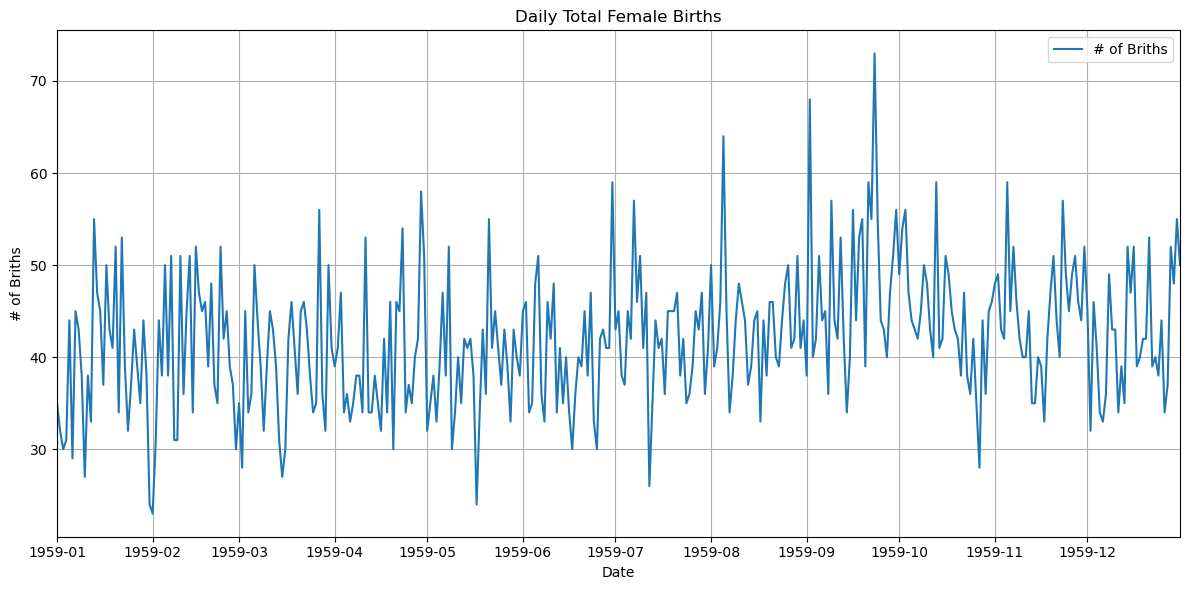

In [3]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Births'], label='# of Briths')     

plt.title('Daily Total Female Births')                      
plt.xlabel('Date')                                        
plt.ylabel('# of Briths')  
plt.xlim(pd.to_datetime('1959-01-01'), pd.to_datetime('1959-12-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [4]:
birth_series = df['Births']

In [5]:
# tail-rolling average transform
rolling = birth_series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64

In [6]:
(35+32+30)/3

32.333333333333336

In [7]:
(32+30+31)/3

31.0

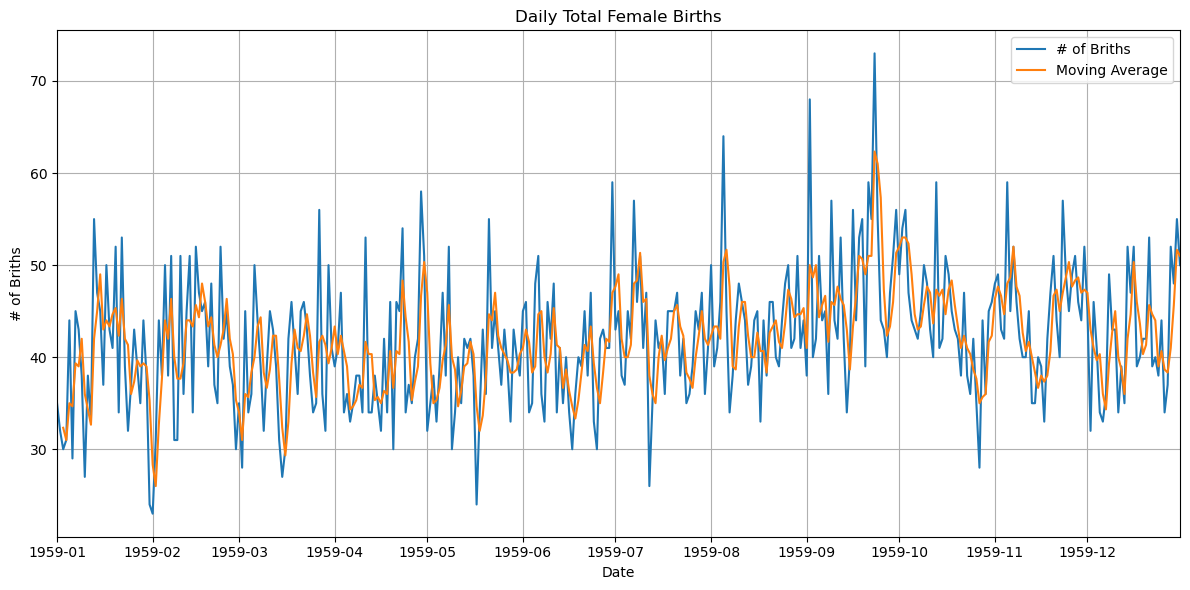

In [8]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Births'], label='# of Briths')
plt.plot(df.index, rolling_mean, label='Moving Average')   

plt.title('Daily Total Female Births')                      
plt.xlabel('Date')                                        
plt.ylabel('# of Briths')  
plt.xlim(pd.to_datetime('1959-01-01'), pd.to_datetime('1959-12-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

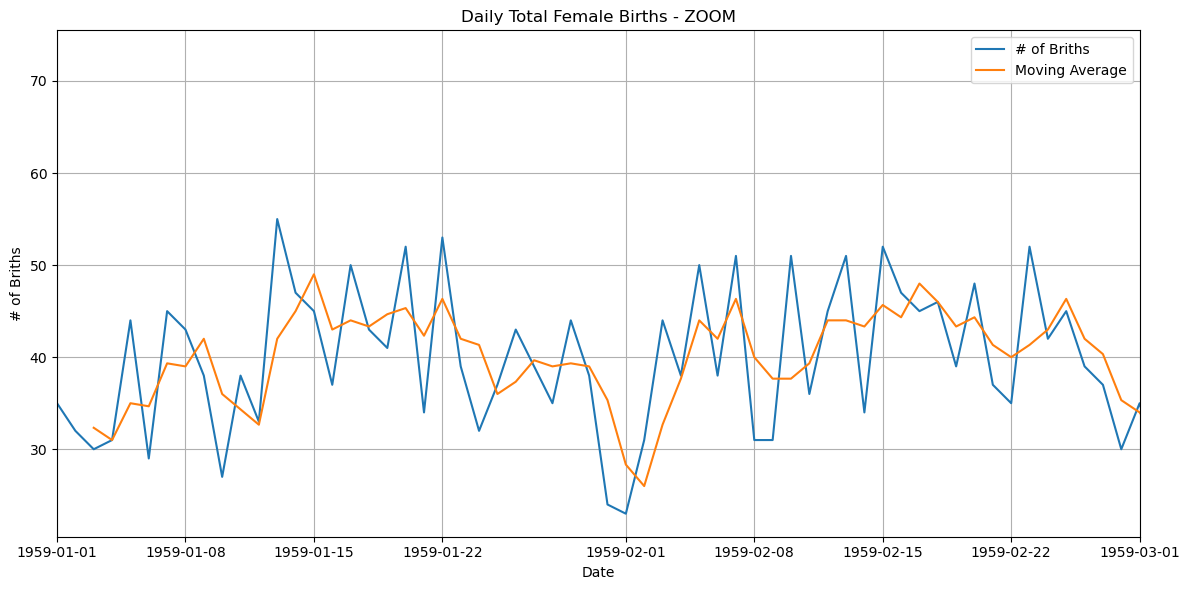

In [9]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Births'], label='# of Briths')
plt.plot(df.index, rolling_mean, label='Moving Average')   

plt.title('Daily Total Female Births - ZOOM')                      
plt.xlabel('Date')                                        
plt.ylabel('# of Briths')  
plt.xlim(pd.to_datetime('1959-01-01'), pd.to_datetime('1959-03-01'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

In [10]:
from pandas import concat

width = 3
lag1 = df.shift(1)                                # Shift the series by 1 to get t
lag3 = df.shift(width - 1)                        # Shift by 2 to prepare for rolling window
window = lag3.rolling(window=width)               # Rolling window of size 3
means = window.mean()                             # Moving average

dataframe = concat([means, lag1, df], axis=1)     # Concatenate into a single DataFrame
dataframe.columns = ['mean', 't', 't+1']          # Rename columns
dataframe.head(10)                                # Display first 10 rows

,mean,t,t+1
Date,,,
1959-01-01,NaN,NaN,35
1959-01-02,NaN,35.0,32
1959-01-03,NaN,32.0,30
1959-01-04,NaN,30.0,31
1959-01-05,32.333333,31.0,44
1959-01-06,31.000000,44.0,29
1959-01-07,35.000000,29.0,45
1959-01-08,34.666667,45.0,43
1959-01-09,39.333333,43.0,38


In [11]:
from numpy import mean
from math import sqrt
from sklearn.metrics import mean_squared_error


X = df['Births']                                  # Select the 'Births' column as the time series
window = 3                                        # Set the window size for the moving average
history = [X.iloc[i] for i in range(window)]      # Initialize history with the first 'window' observations
test = [X.iloc[i] for i in range(window, len(X))] # Remaining values used as test set
predictions = list()                              # Empty list to store predictions

# walk forward over time steps in test
for t in range(len(test)):                        
    length = len(history)                         # Current size of the history
    yhat = mean([history[i] for i in range(length-window, length)])  # Compute mean of last 'window' values
    obs = test[t]                                 # Actual observation at time t
    predictions.append(yhat)                      # Store the prediction
    history.append(obs)                           # Add the actual observation to history for next step
    print('predicted=%f, expected=%f' % (yhat, obs))  # Print predicted vs actual

rmse = sqrt(mean_squared_error(test, predictions))    # Compute RMSE between predictions and actual values
print('Test RMSE: %.3f' % rmse)                       # Print final RMSE

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


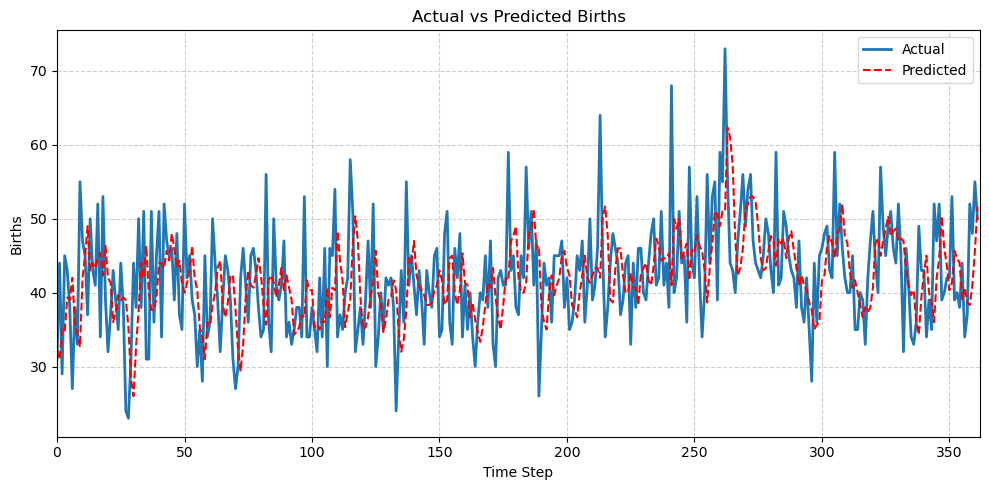

In [12]:
# Set up figure size
plt.figure(figsize=(10, 5))                   # Set figure size

# Plot actual test data
plt.plot(test, label='Actual', linewidth=2)   # Plot test data

# Plot predictions
plt.plot(predictions, color='red', linestyle='--', label='Predicted')  # Plot predicted values

# Add labels and title
plt.xlabel('Time Step')                       # X-axis label
plt.ylabel('Births')                          # Y-axis label
plt.title('Actual vs Predicted Births')       # Plot title

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)     # Light dashed grid
plt.legend()                                  # Show legend
plt.xlim(0, 362)

# Display the plot
plt.tight_layout()                            # Adjust layout
plt.show();                                   # Show plot

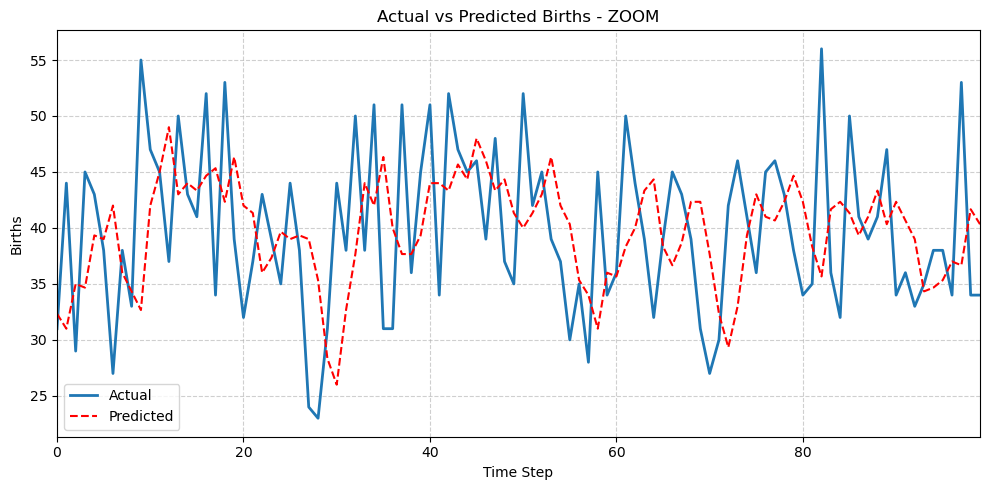

In [13]:
# Set up figure size
plt.figure(figsize=(10, 5))                   # Set figure size

# Plot actual test data
plt.plot(test[:100], label='Actual', linewidth=2)   # Plot test data

# Plot predictions
plt.plot(predictions[:100], color='red', linestyle='--', label='Predicted')  # Plot predicted values

# Add labels and title
plt.xlabel('Time Step')                        # X-axis label
plt.ylabel('Births')                           # Y-axis label
plt.title('Actual vs Predicted Births - ZOOM') # Plot title

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)     # Light dashed grid
plt.legend()                                  # Show legend
plt.xlim(0, 99)

# Display the plot
plt.tight_layout()                            # Adjust layout
plt.show();                                   # Show plot

# Chapter 10 - A Gentle Introduction to White Noise

In [14]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot


# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

# summary stats
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

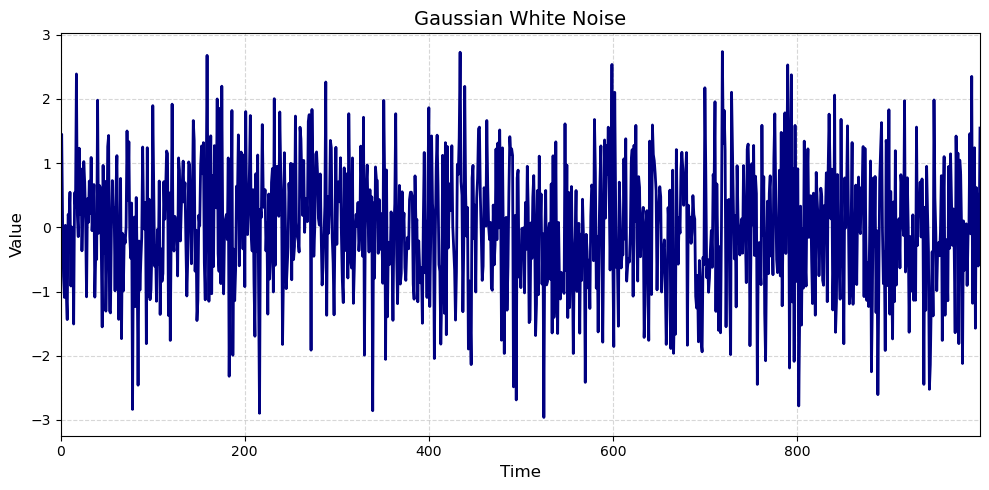

In [15]:
# Set up figure size
plt.figure(figsize=(10, 5))                     # Define a wider plot size

# Line plot of the time series
plt.plot(series, linewidth=2, color='navy')     # Plot with thicker blue line

# Add title and axis labels
plt.title('Gaussian White Noise', fontsize=14)  # Plot title
plt.xlabel('Time', fontsize=12)                 # X-axis label
plt.ylabel('Value', fontsize=12)                # Y-axis label

# Add grid and format
plt.grid(True, linestyle='--', alpha=0.5)       # Add light dashed grid
plt.tight_layout()                              # Adjust layout to prevent overlap
plt.xlim(0,999)                                 # Set limits for X-axis

# Display plot
plt.show();                                     # Show the plot

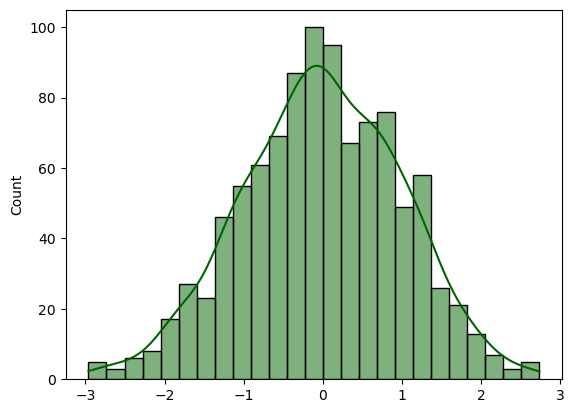

In [16]:
sns.histplot(series, bins=25, edgecolor='black', color='darkgreen', kde=True)
plt.show();

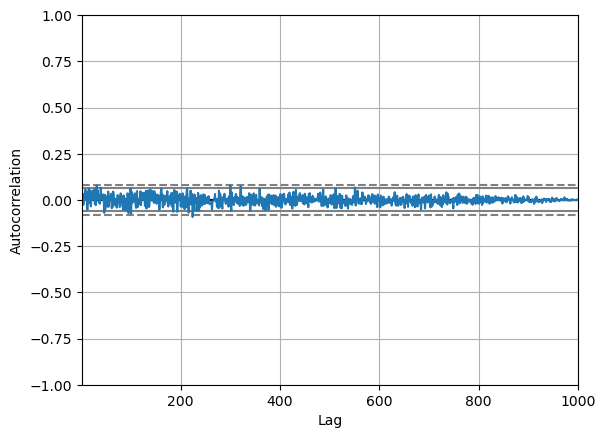

In [17]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

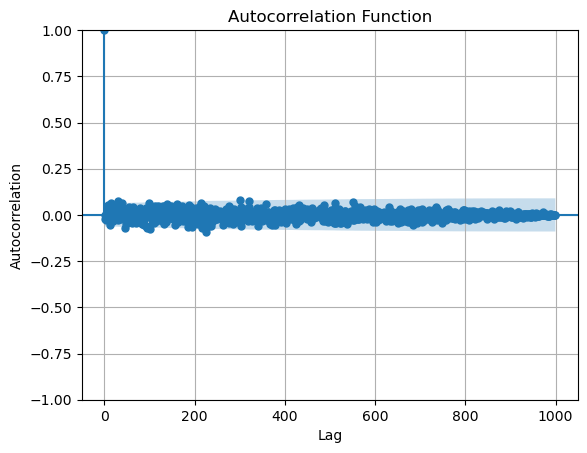

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=999)                    
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show();

# Chapter 11 - A Gentle Introduction to the Random Walk

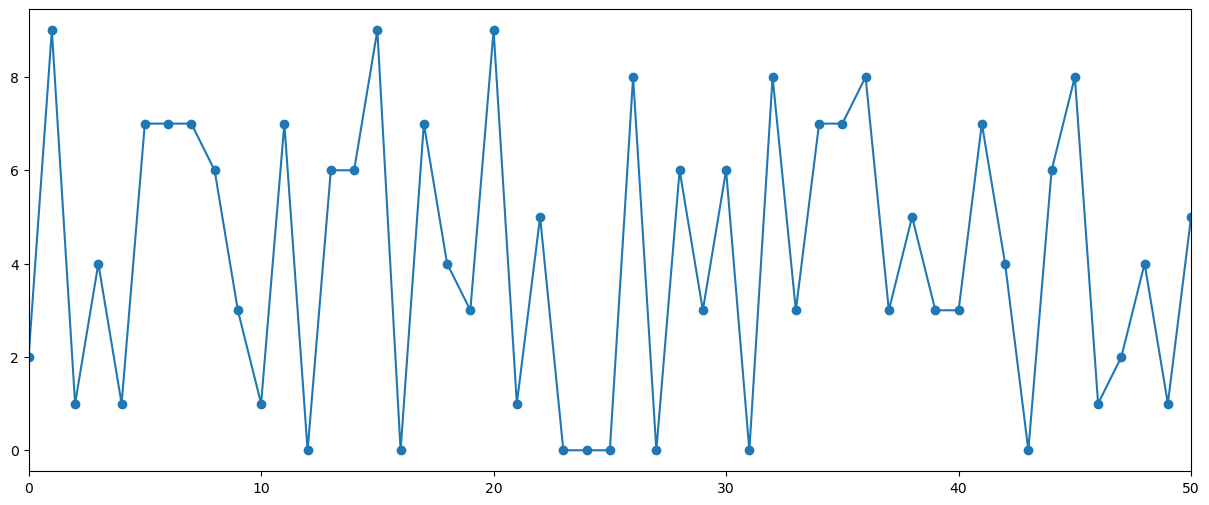

In [19]:
# create and plot a random series
from random import seed
from random import randrange

seed(1)
series = [randrange(10) for i in range(1000)]

plt.figure(figsize=(15, 6))
plt.plot(series, marker='o')
plt.xlim(0, 50)
plt.show()

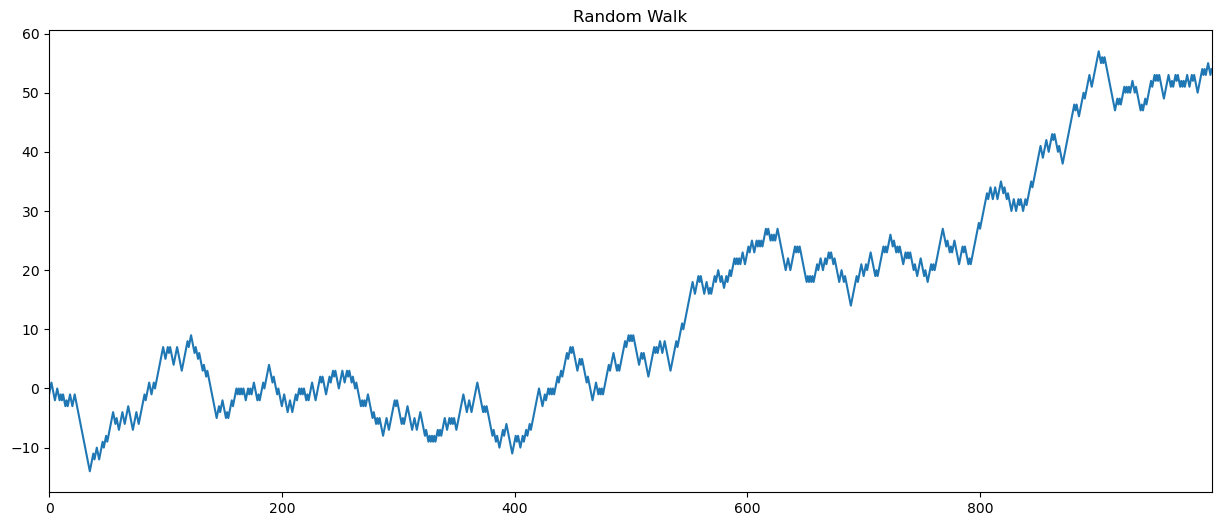

In [20]:
# create and plot a random walk
from random import seed
from random import random

seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)

for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)


plt.figure(figsize=(15, 6))
plt.plot(random_walk)
plt.title('Random Walk')    
plt.xlim(0, 999)
plt.show()

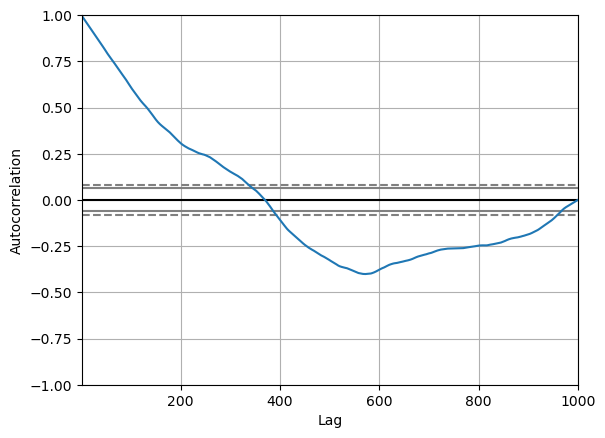

In [21]:
from pandas.plotting import autocorrelation_plot

# Plot the autocorrelation of a random walk
seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
autocorrelation_plot(random_walk)
plt.show()

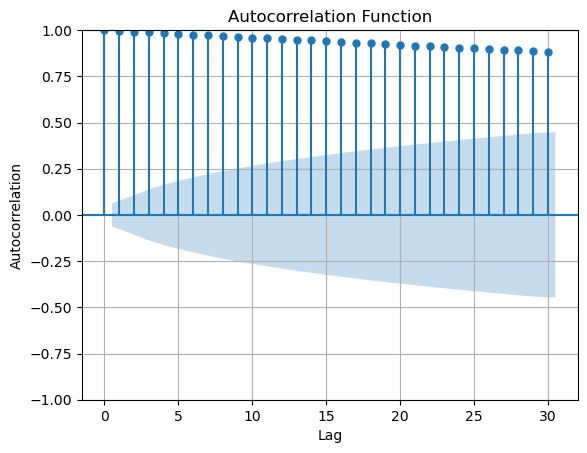

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(random_walk, lags=30)                    
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [23]:
# calculate the stationarity of a random walk
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller

# generate random walk
seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


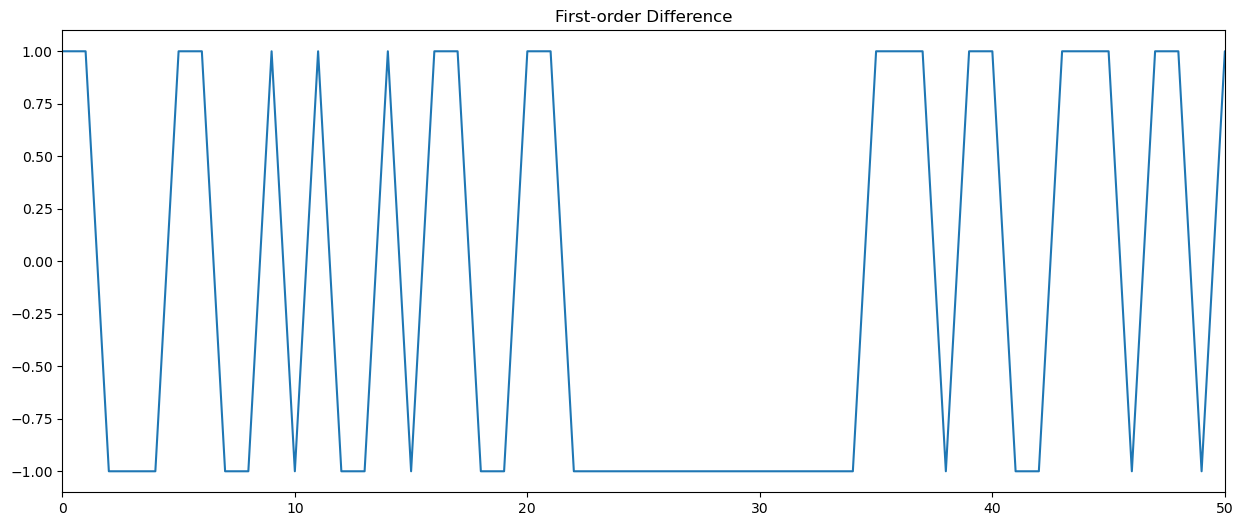

In [24]:
# calculate and plot a differenced random walk
from random import seed
from random import random

# create random walk
seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
    
# line plot
plt.figure(figsize=(15, 6))
plt.plot(diff)
plt.title('First-order Difference')    
plt.xlim(0, 50)
plt.show()

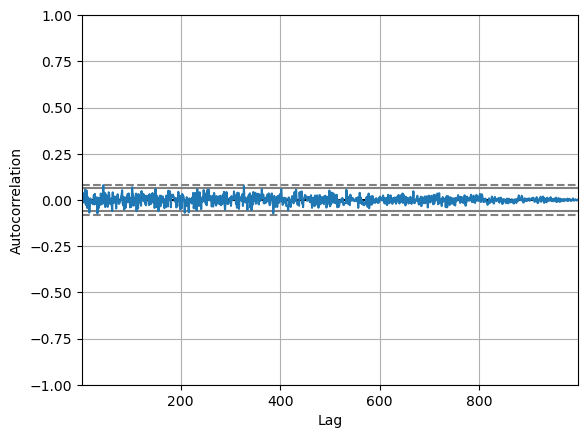

In [25]:
# line plot
autocorrelation_plot(diff)
plt.show()

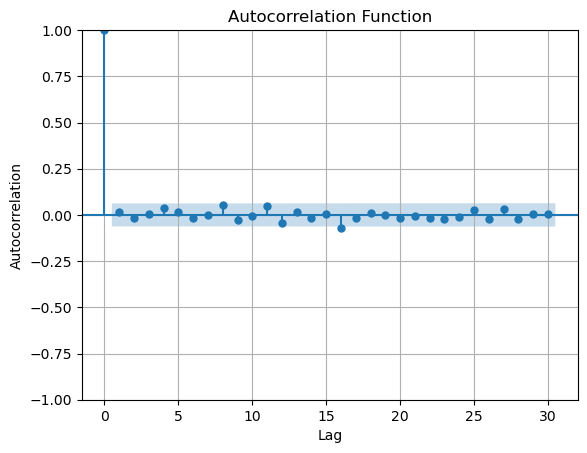

In [26]:
plot_acf(diff, lags=30)                    
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

In [27]:
# persistence forecasts for a random walk
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt

# generate the random walk
seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# persistence
predictions = list()
history = train[-1]

for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


In [28]:
# random predictions for a random walk
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt

# generate the random walk
seed(1)
random_walk = list()

random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


# Chapter 12 - Decompose Time Series Data

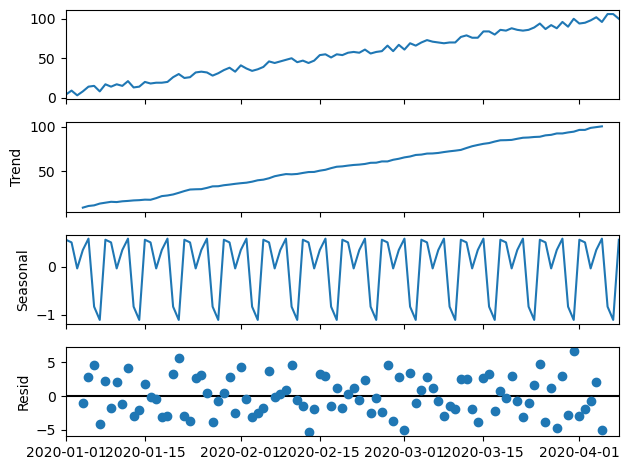

In [29]:
from random import randrange
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a simple additive time series with noise
series = [i + randrange(10) for i in range(1, 100)]

# Convert to a Pandas Series with a DateTimeIndex
date_range = pd.date_range(start='2020-01-01', periods=len(series), freq='D')
series = pd.Series(series, index=date_range)

# Decompose the time series using additive model
result = seasonal_decompose(series, model='additive', period=7)  # 7-day seasonality

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

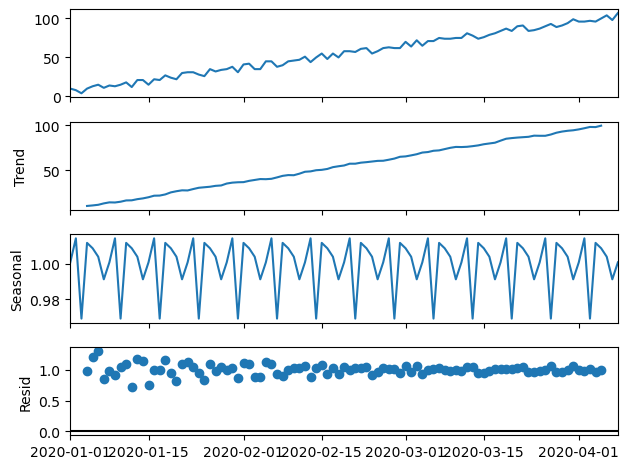

In [30]:
# Create a simple additive time series with noise
series = [i + randrange(10) for i in range(1, 100)]

# Convert to a Pandas Series with a DateTimeIndex
date_range = pd.date_range(start='2020-01-01', periods=len(series), freq='D')
series = pd.Series(series, index=date_range)

# Decompose the time series using multiplicative model
result = seasonal_decompose(series, model='multiplicative', period=7)  # 7-day seasonality

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

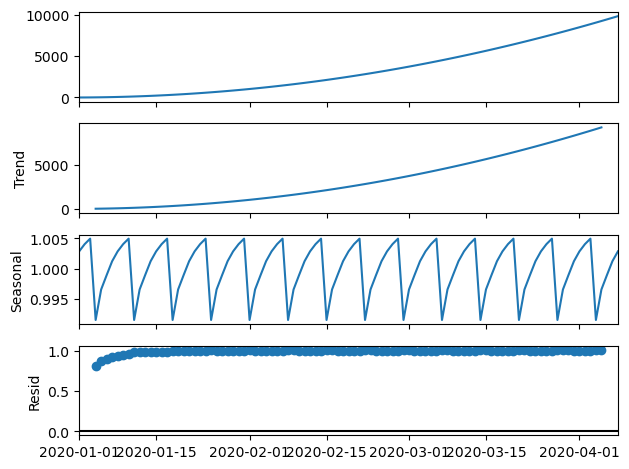

In [31]:
# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

series = [i**2.0 for i in range(1,100)]

# Convert to pandas Series with datetime index
date_range = pd.date_range(start='2020-01-01', periods=len(series), freq='D')
series = pd.Series(series, index=date_range)

# Decompose using multiplicative model with period=7 (weekly seasonality)
result = seasonal_decompose(series, model='multiplicative', period=7)

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

In [32]:
url2 = ('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv')
df = pd.read_csv(url2)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [33]:
df = df.set_index('Month')               # Set 'Month' as index
df.index = pd.to_datetime(df.index)      # Ensure datetime format
df = df.rename_axis('Date')              # Rename index to 'Date'

df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


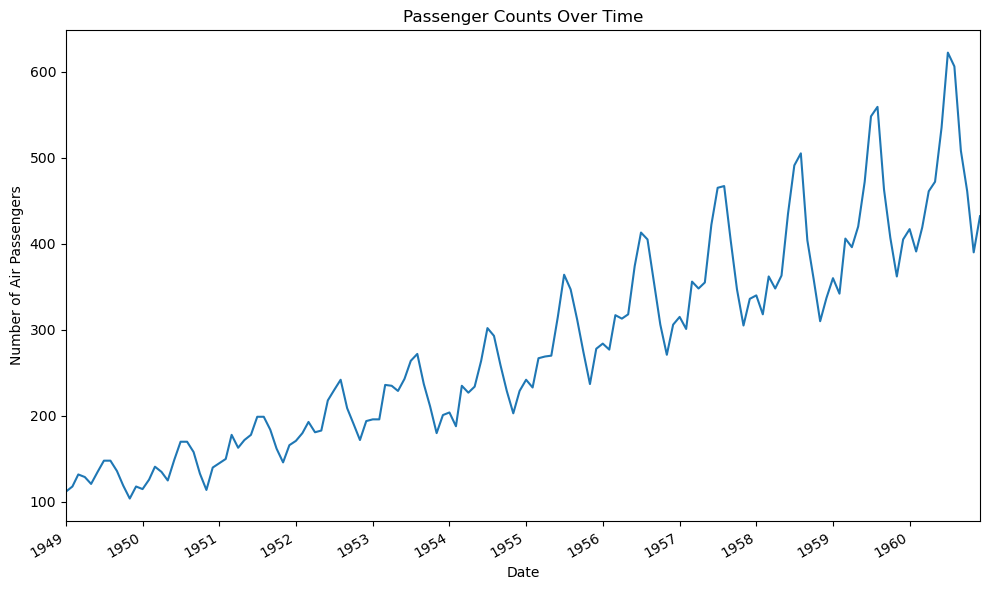

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
ax.plot(df.index, df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Air Passengers')
ax.set_title('Passenger Counts Over Time')
ax.set_xlim(pd.to_datetime('1949-01-01'), pd.to_datetime('1960-12-01'))

# Use 12 ticks for 1949–1960
tick_dates = pd.date_range(start='1949', end='1960', freq='YS')
tick_labels = np.arange(1949, 1961, 1)

ax.set_xticks(tick_dates)
ax.set_xticklabels(tick_labels)

fig.autofmt_xdate()
plt.tight_layout()
plt.show();

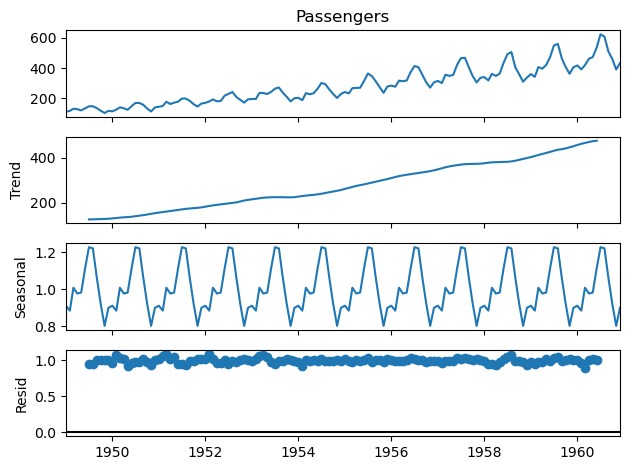

In [35]:
series = df['Passengers']

result = seasonal_decompose(series , model='multiplicative')

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

# Chapter 13 - Use and Remove Trends

In [36]:
# Load the CSV without parsing dates
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url)

# Convert 'Month' column to datetime using custom parser
df['Month'] = pd.to_datetime('190' + df['Month'], format='%Y-%m')

# Set it as the index
df.set_index('Month', inplace=True)

# Show result
df

# Transform 'Sales' column into a Series
X = df['Sales']                                              

# First-order differencing
diff = list()                          # Initialize list to hold differences
for i in range(1, len(X)):             # Loop through positions
    value = X.iloc[i] - X.iloc[i - 1]  # Use iloc for position-based access
    diff.append(value)                 # Append the difference

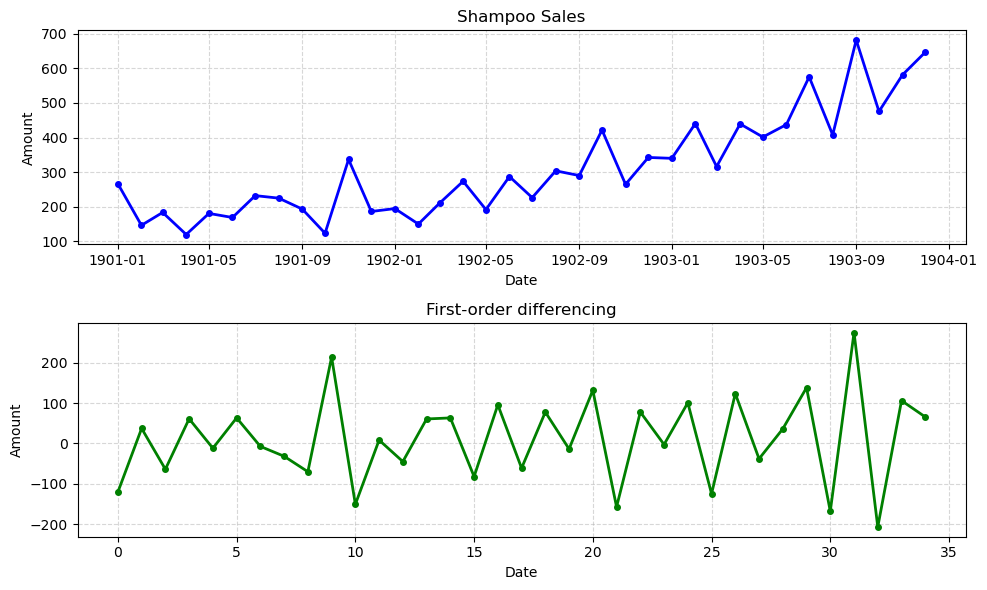

In [37]:
# Create the figure
plt.figure(figsize=(10, 6))  # Wider and taller plot

# Line plot (top)
plt.subplot(2, 1, 1)                       
plt.plot(X, color='blue', linewidth=2, marker='o', markersize=4)
plt.title('Shampoo Sales')  
plt.xlabel('Date')
plt.ylabel('Amount')                         
plt.grid(True, linestyle='--', alpha=0.5)    

# Histogram (bottom)
plt.subplot(2, 1, 2)                         
plt.plot(diff, color='green', linewidth=2, marker='o', markersize=4)
plt.title('First-order differencing')     
plt.xlabel('Date')                          
plt.ylabel('Amount')                      
plt.grid(True, linestyle='--', alpha=0.5)    

# Display the combined plot
plt.tight_layout()
plt.show()

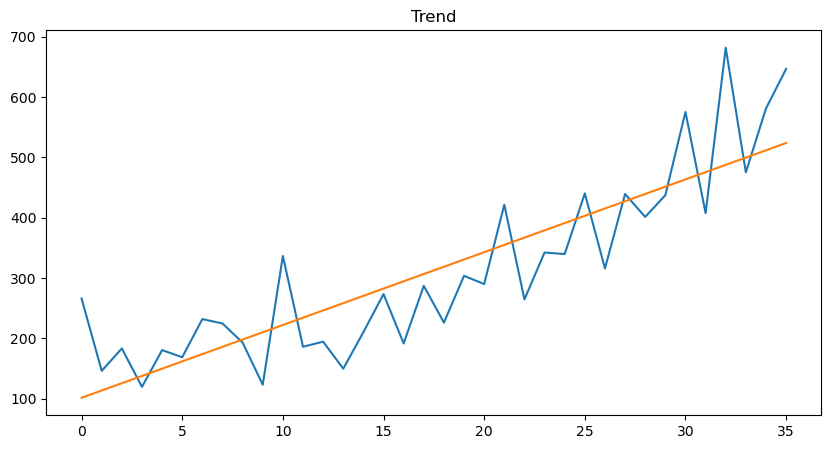

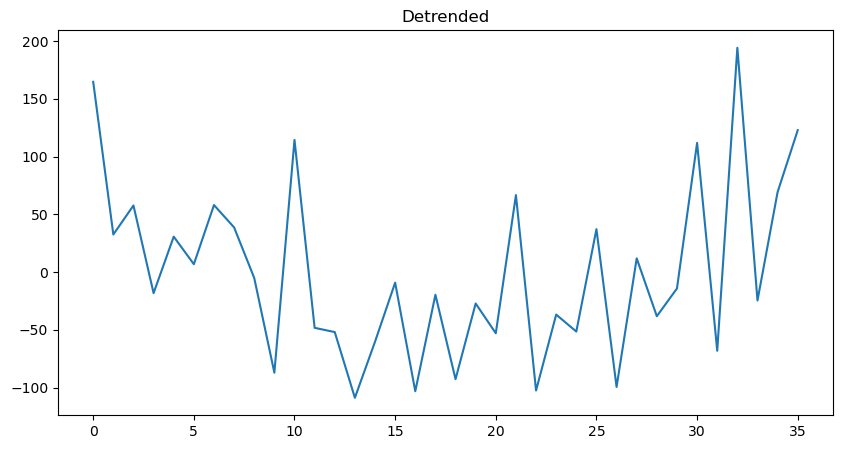

In [38]:
# use a linear model to detrend a time series
from sklearn.linear_model import LinearRegression

series = df['Sales']

# fit linear model
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
plt.figure(figsize=(10, 5))
plt.plot(y)
plt.plot(trend)
plt.title('Trend')   
plt.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

# plot detrended
plt.figure(figsize=(10, 5))
plt.plot(detrended)
plt.title('Detrended') 
plt.show()

# Chapter 14- Use and Remove Seasonality

In [39]:
url4 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-min-temperatures.csv')
df4 = pd.read_csv(url4, header=0, index_col=0, parse_dates=True)

df4

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [40]:
X = df4['Temp']
X

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [41]:
diff = list()                                      # Initialize an empty list to store yearly differences

days_in_year = 365                                 # Define the lag period for yearly difference

for i in range(days_in_year, len(X)):              # Loop over the series starting from the 365th element
    value = X.iloc[i] - X.iloc[i - days_in_year]   # Calculate the difference with the same day of the previous year
    diff.append(value)                             # Append the calculated difference to the list

In [42]:
len(X)

3650

In [43]:
len(diff)

3285

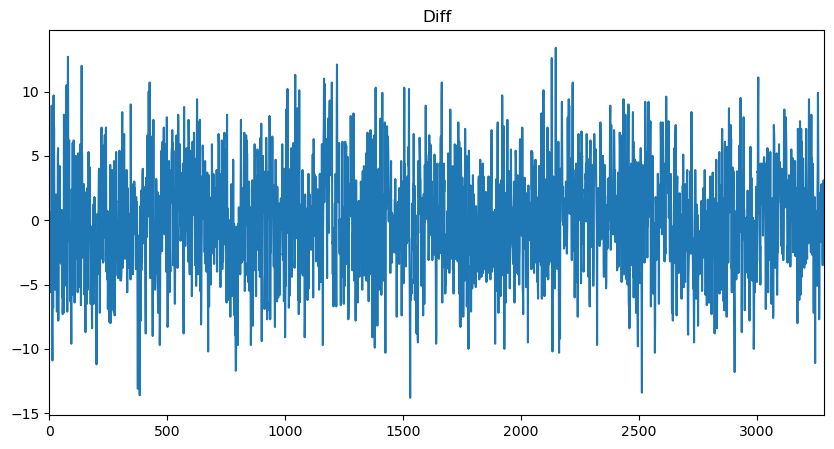

In [44]:
# plot trend
plt.figure(figsize=(10, 5))
plt.plot(diff)
plt.title('Diff') 
plt.xlim(0,3284)
plt.show()

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: ME, Name: Temp, dtype: float64


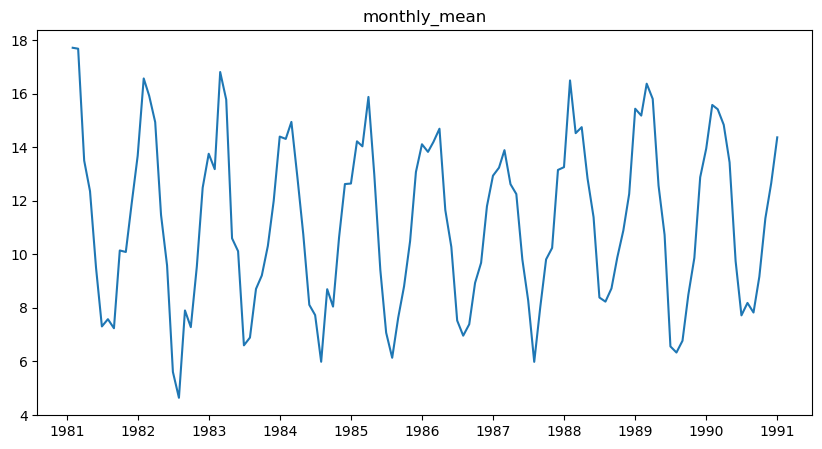

In [45]:
resample = X.resample('ME')
monthly_mean = resample.mean()
print(monthly_mean.head(13))


# plot seasonality
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean)
plt.title('monthly_mean') 
#plt.xlim(0,3284)
plt.show()

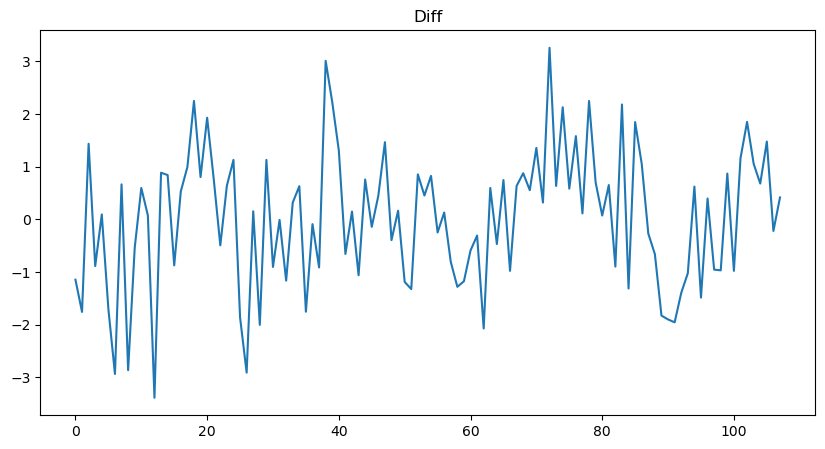

In [46]:
diff = list()
months_in_year = 12

for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
    diff.append(value)

# plot diff
plt.figure(figsize=(10, 5))
plt.plot(diff)
plt.title('Diff') 
#plt.xlim(0,3284)
plt.show()

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]



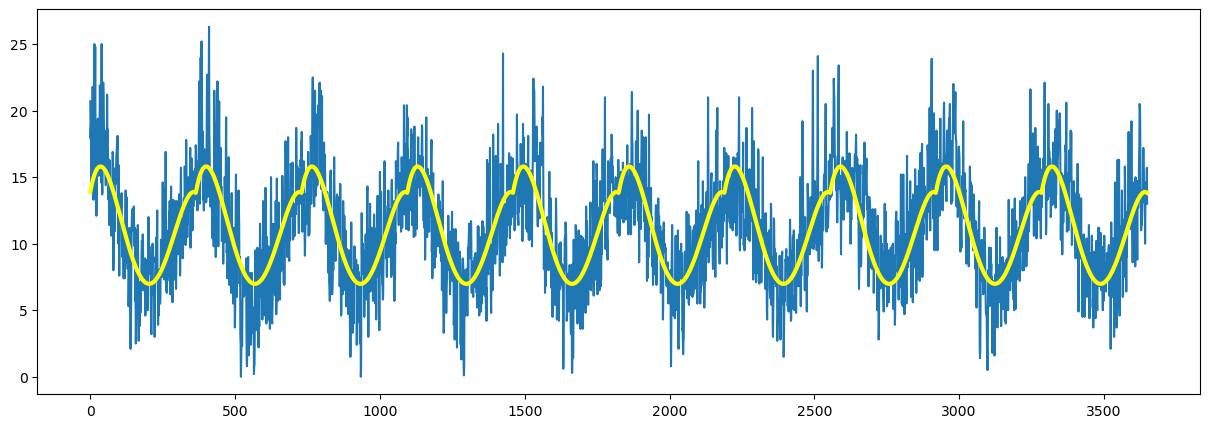

In [47]:
from numpy import polyfit

series = df4['Temp']

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
print()

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

# plot curve
plt.figure(figsize=(15, 5))
plt.plot(series.values)
plt.plot(curve, color='yellow', linewidth=3)
plt.show()

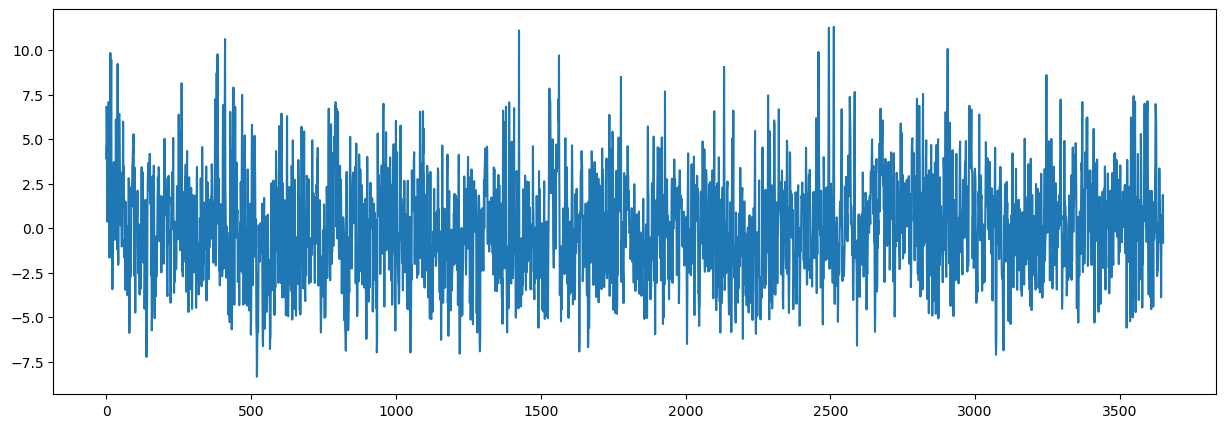

In [48]:
# deseasonalize by differencing with a polynomial model

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
    
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)

# plot curve
plt.figure(figsize=(15, 5))
plt.plot(diff)
plt.show()

# Chapter 15 - Stationarity in Time Series Data

In [49]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-total-female-births.csv')
df = pd.read_csv(url1, header=0, index_col=0, parse_dates=True)

df

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


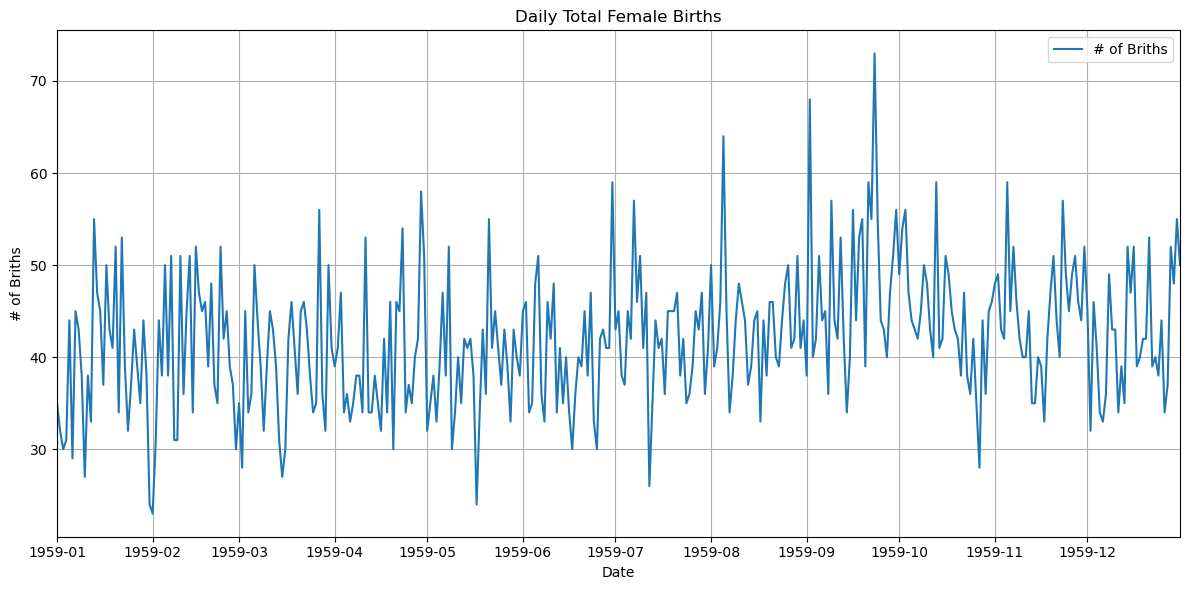

In [50]:
# Plot serie
plt.figure(figsize=(12, 6))                                      

plt.plot(df.index, df['Births'], label='# of Briths')     

plt.title('Daily Total Female Births')                      
plt.xlabel('Date')                                        
plt.ylabel('# of Briths')  
plt.xlim(pd.to_datetime('1959-01-01'), pd.to_datetime('1959-12-31'))
plt.grid(True)                                            
plt.legend()                                             
plt.tight_layout()                                       
plt.show()

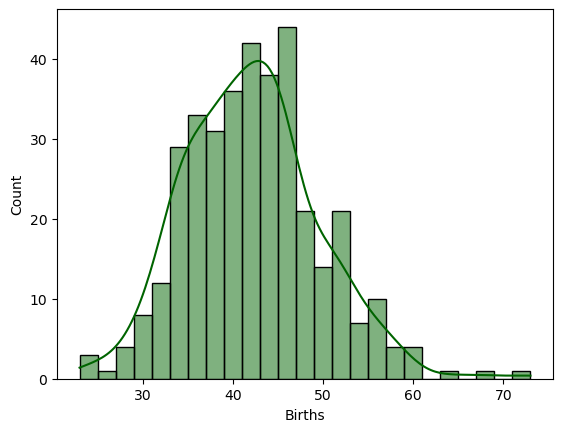

In [51]:
sns.histplot(df['Births'], bins=25, edgecolor='black', color='darkgreen', kde=True)
plt.show();

In [52]:
X = df['Births'].values

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f,     mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736,     mean2=44.185792
variance1=49.213410, variance2=48.708651


In [53]:
url2 = ('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/refs/heads/master/data/air-passengers.csv')
df = pd.read_csv(url2)

df = df.set_index('Month')               # Set 'Month' as index
df.index = pd.to_datetime(df.index)      # Ensure datetime format
df = df.rename_axis('Date')              # Rename index to 'Date'

df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


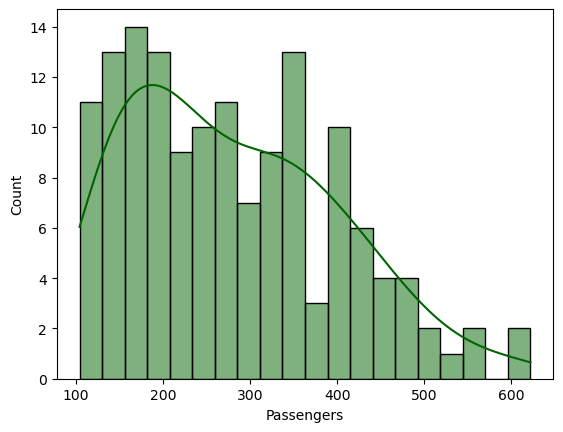

In [54]:
sns.histplot(df['Passengers'], bins=20, edgecolor='black', color='darkgreen', kde=True)
plt.show();

In [55]:
X = df['Passengers'].values

split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f,     mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778,     mean2=377.694444
variance1=2244.087770, variance2=7367.962191


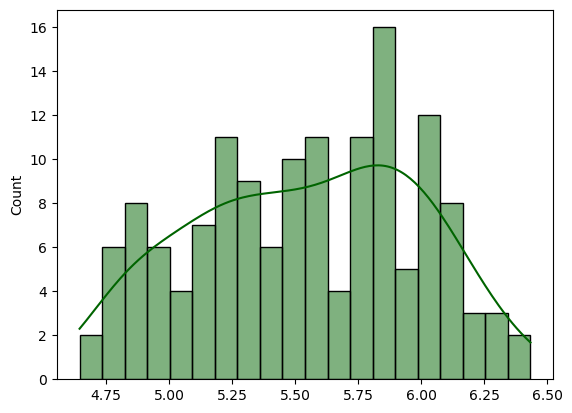

In [56]:
from numpy import log

X_log = log(X)

sns.histplot(X_log, bins=20, edgecolor='black', color='darkgreen', kde=True)
plt.show();

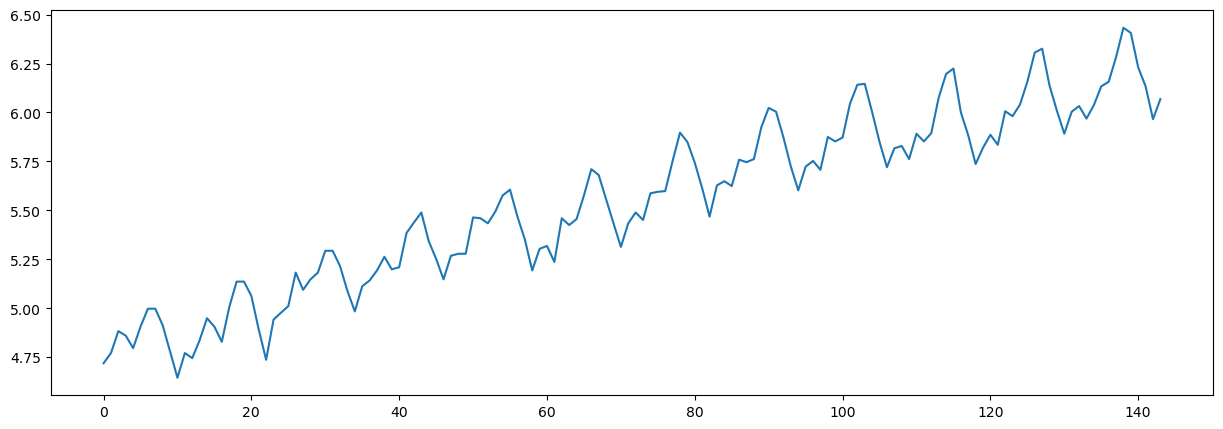

In [57]:
# plot curve
plt.figure(figsize=(15, 5))
plt.plot(X_log)
plt.show()

In [58]:
X_log = log(X)
split = int(len(X_log) / 2)
X1, X2 = X_log[0:split], X_log[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f,     mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146,     mean2=5.909206
variance1=0.068375, variance2=0.049264


In [59]:
url1 = ('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/daily-total-female-births.csv')
df = pd.read_csv(url1, header=0, index_col=0, parse_dates=True)

X = df['Births'].values

In [60]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
